In [56]:
import requests
import json
import os
import csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
import datetime as dt
from scipy.stats import linregress, pearsonr

pd.options.display.float_format = "{:,.2f}".format

ww_gross = pd.read_csv("datacreatedcsv/allmoviesdata.csv")

ww_gross

,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,0,48,Black Panther,"200,000,000.00","700,059,566.00",1336494320.00,Action,Adventure,Drama,7.40,Walt Disney Pictures,2018,NaN,Ryan Coogler
1,1,5,Avengers: Infinity War,"300,000,000.00","678,815,482.00",2048359754.00,Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"
2,2,50,Incredibles 2,"200,000,000.00","608,581,744.00",1242805359.00,Animation,Action,Adventure,7.80,Pixar,2018,NaN,Brad Bird
3,3,144,Jurassic World: Fallen Kingdom,"170,000,000.00","417,719,760.00",1308323302.00,Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN,J.A. Bayona
4,4,11,Solo: A Star Wars Story,"275,000,000.00","213,767,512.00",393151347.00,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN,Ron Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,204,"4,918",Annie Hall,"4,000,000.00","38,251,425.00",38251425,Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977,tt0075686,Woody Allen
217,205,"2,387",The Omen,"25,000,000.00","54,607,383.00",119295584,Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005,Richard Donner
218,206,44,King Kong,"207,000,000.00","218,080,025.00",550517357.00,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751,John Guillermin
219,207,445,Midway,"100,000,000.00","56,846,802.00",126815030.00,History,Drama,Action,6.70,Universal Pictures,1976,tt0074899,Jack Smight


In [14]:
ww_gross['Year'].min()

1975

In [15]:
ww_gross['Year'].max()

2018

The r-value is 0.44458719428774257


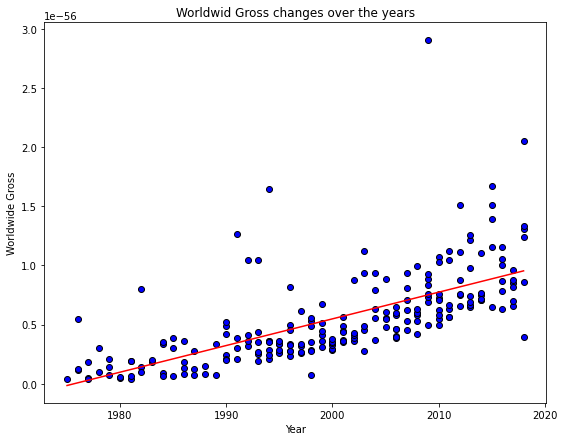

In [138]:
year = ww_gross['Year']
wwg = ww_gross['Worldwide Gross']
prod_budget= ww_gross["Production Budget"]
domestic= ww_gross["Domestic Gross"]
ww_gross["Worldwide Gross"] = (ww_gross["Worldwide Gross"].astype(float))/100000
ww_gross["Production Budget"] = (ww_gross["Production Budget"].astype(float))/100000
domestic= ww_gross["Domestic Gross"]= (ww_gross["Production Budget"].astype(float))/100000
ww_gross = ww_gross.sort_values(by=['Year'], ascending=True)

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, wwg)
regress_val=(year * slope + intercept)
correlation= pearsonr(year, domestic)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(year,wwg, marker='o',edgecolors='black', facecolors='blue', alpha=1.0,)
plt.plot(year, regress_val, "r-")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross")
plt.title('Worldwid Gross changes over the years')
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

The r-value is 0.48080109045730096


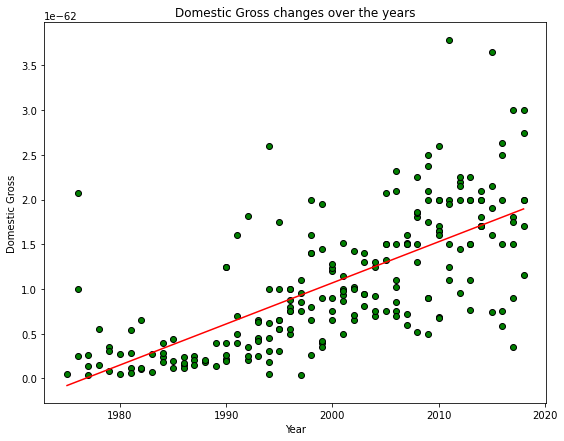

In [137]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, domestic)
regress_val=(year * slope + intercept)
correlation= pearsonr(year, domestic)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(year,domestic, marker='o',edgecolors='black', facecolors='g', alpha=1.0,)
plt.plot(year, regress_val, "r-")
plt.xlabel("Year")
plt.ylabel("Domestic Gross")
plt.title('Domestic Gross changes over the years')
print(f"The r-value is {rvalue**2}")
plt.show()

<AxesSubplot:xlabel='Year'>

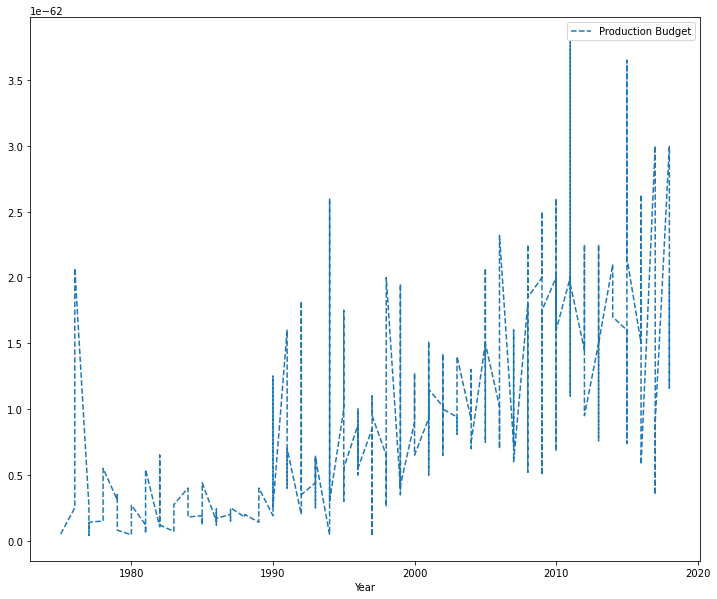

In [141]:
ww_gross.plot.line("Year", "Production Budget", linestyle='dashed', figsize=(12, 10))